In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from loadTDMS import *
from fft_test_CF import *
from tqdm import tqdm

### Non-Cuttingの平均電圧調べ

In [40]:
def get_average(num):
    date = 20221027
    path = rf"Z:\100 Raw_data\{date}---切削実験\Dynamometer\Non-Cutting\Dynamo_{num}.tdms"
    c_d = load_tdms(path, ch_num=3)
    a = np.array(c_d[1])
    return np.average(a)

In [4]:
non_cutting_avg = []
for i in tqdm(range(1,170)):
    get_average(i, non_cutting_avg)

100%|██████████| 169/169 [00:29<00:00,  5.82it/s]


In [45]:
%%time
R = np.array(list(map(get_average, tqdm(np.arange(1,170)))))

100%|██████████| 169/169 [00:17<00:00,  9.70it/s]

Wall time: 17.4 s


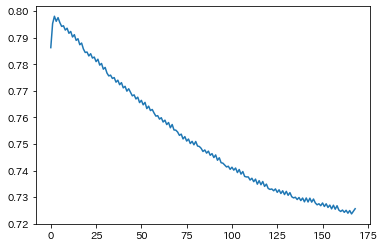

In [46]:
plt.plot(R)

## ドリフト考慮あり　切削抵抗のみ 
#### 半回転の最大値 1pathに592回転=1184半回転
以下のコードは半回転ごとにしたら、増減が激しかったので、1回転ごとにした

In [69]:
def get_min_drift(num):
    date = 20221027
    path = rf"Z:\100 Raw_data\{date}---切削実験\Dynamometer\Cutting\Dynamo_{num}.tdms"
    nc_path = rf"Z:\100 Raw_data\{date}---切削実験\Dynamometer\Non-Cutting\Dynamo_{num}.tdms"
    c_d = load_tdms(path, ch_num=3)
    nc_d = load_tdms(nc_path, ch_num=3)
    
    # 最後のpath
    if num ==169:
        cd = np.array(c_d[1][:1000000])
        ncd = np.array(c_d[1][:1000000])    
   
    # 最後のpath以外
    else:
        cd = np.array(c_d[1][:4930000])
        ncd = np.array(c_d[1][:4930000]) 

    cf = ( cd - np.average(ncd) ) * (-500)
    
    np.save(rf"Z:\200 Produced_data\20221027\CF\{num}",cf)
    return

In [70]:
%%time
list(map(get_min_drift, tqdm(np.arange(1,170))))










  0%|          | 0/169 [00:00<?, ?it/s]








  1%|          | 1/169 [00:01<03:06,  1.11s/it]








  1%|          | 2/169 [00:02<03:05,  1.11s/it]








  2%|▏         | 3/169 [00:03<03:04,  1.11s/it]








  2%|▏         | 4/169 [00:04<03:08,  1.14s/it]








  3%|▎         | 5/169 [00:05<03:07,  1.14s/it]








  4%|▎         | 6/169 [00:06<03:05,  1.14s/it]








  4%|▍         | 7/169 [00:08<03:08,  1.16s/it]








  5%|▍         | 8/169 [00:09<03:04,  1.15s/it]








  5%|▌         | 9/169 [00:10<03:06,  1.17s/it]








  6%|▌         | 10/169 [00:11<03:03,  1.15s/it]








  7%|▋         | 11/169 [00:12<03:04,  1.17s/it]








  7%|▋         | 12/169 [00:13<03:01,  1.16s/it]








  8%|▊         | 13/169 [00:14<02:58,  1.15s/it]








  8%|▊         | 14/169 [00:16<02:57,  1.15s/it]








  9%|▉         | 15/169 [00:17<02:58,  1.16s/it]








  9%|▉         | 16/169 [00:18<02:56,  1.16s/it]








 10%|█         | 17/169 [00:19<02:55,  1

Wall time: 3min 26s


In [22]:
d = np.load(rf"Z:\200 Produced_data\20221027\CF\20.npy")

In [72]:
d.shape

(4930000,)

In [23]:
%matplotlib qt
# fig = plt.figure(figsize=(11.69*0.9,8.27*0.9), dpi=100)
plt.figure()
plt.plot(d)

In [20]:
dt = (1/10**6)/3
split_t_r = 0.1 # 1つの枠で全体のどの割合のデータを分析するか。
overlap = 0.5  # オーバーラップ率
window_F = "hamming"  # 窓関数選択: hanning, hamming, blackman
N = 2**13
fq = fq = np.linspace(0, N*dt, N)
y_label = "amplitude"
y_unit = "V"

In [21]:
start = 8333*100
end = start + N
num = 1
ds = d[start:end]
fq_, amp_ = FFT_main(fq, ds, dt, split_t_r, overlap, window_F)

output_FN = fr"Z:\200 Produced_data\20221027\CF\fig\FFT_test20_hamming"
plot_FFT(fq_, amp_, output_FN, y_label, y_unit,num)



0

In [ ]:
amp_